In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input , train_target) , (test_input , test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_scaled = train_input.reshape(-1, 28 , 28 , 1) / 255.0

train_scaled ,val_scaled , train_target , val_target = train_test_split(train_scaled, train_target , test_size = 0.2 , random_state = 42)


Make a CNN

In [4]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = 3 , activation = "relu", padding = "same" , input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3 , activation = "relu" , padding = "same"))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

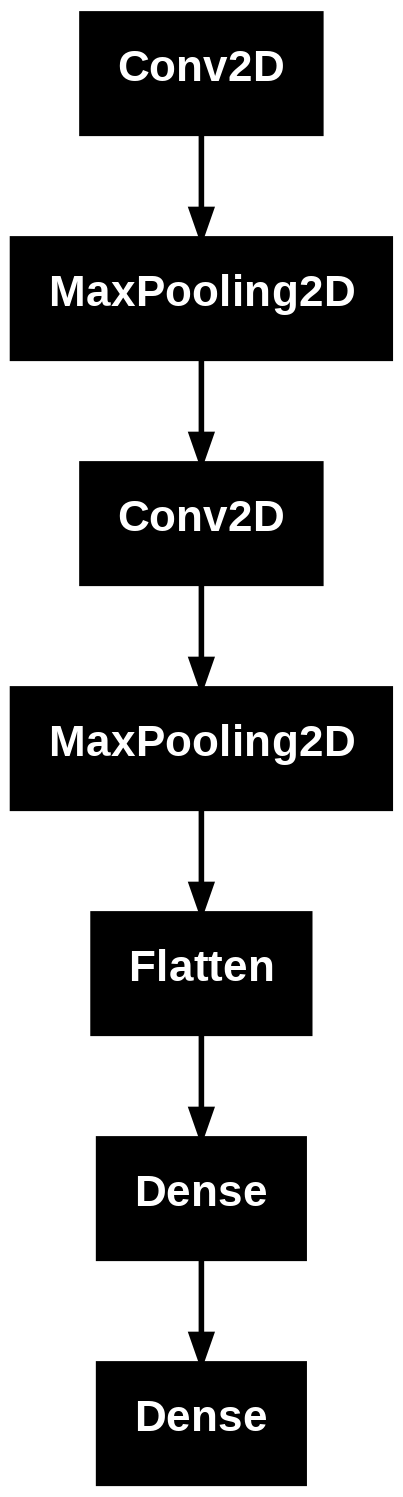

In [7]:
keras.utils.plot_model(model)

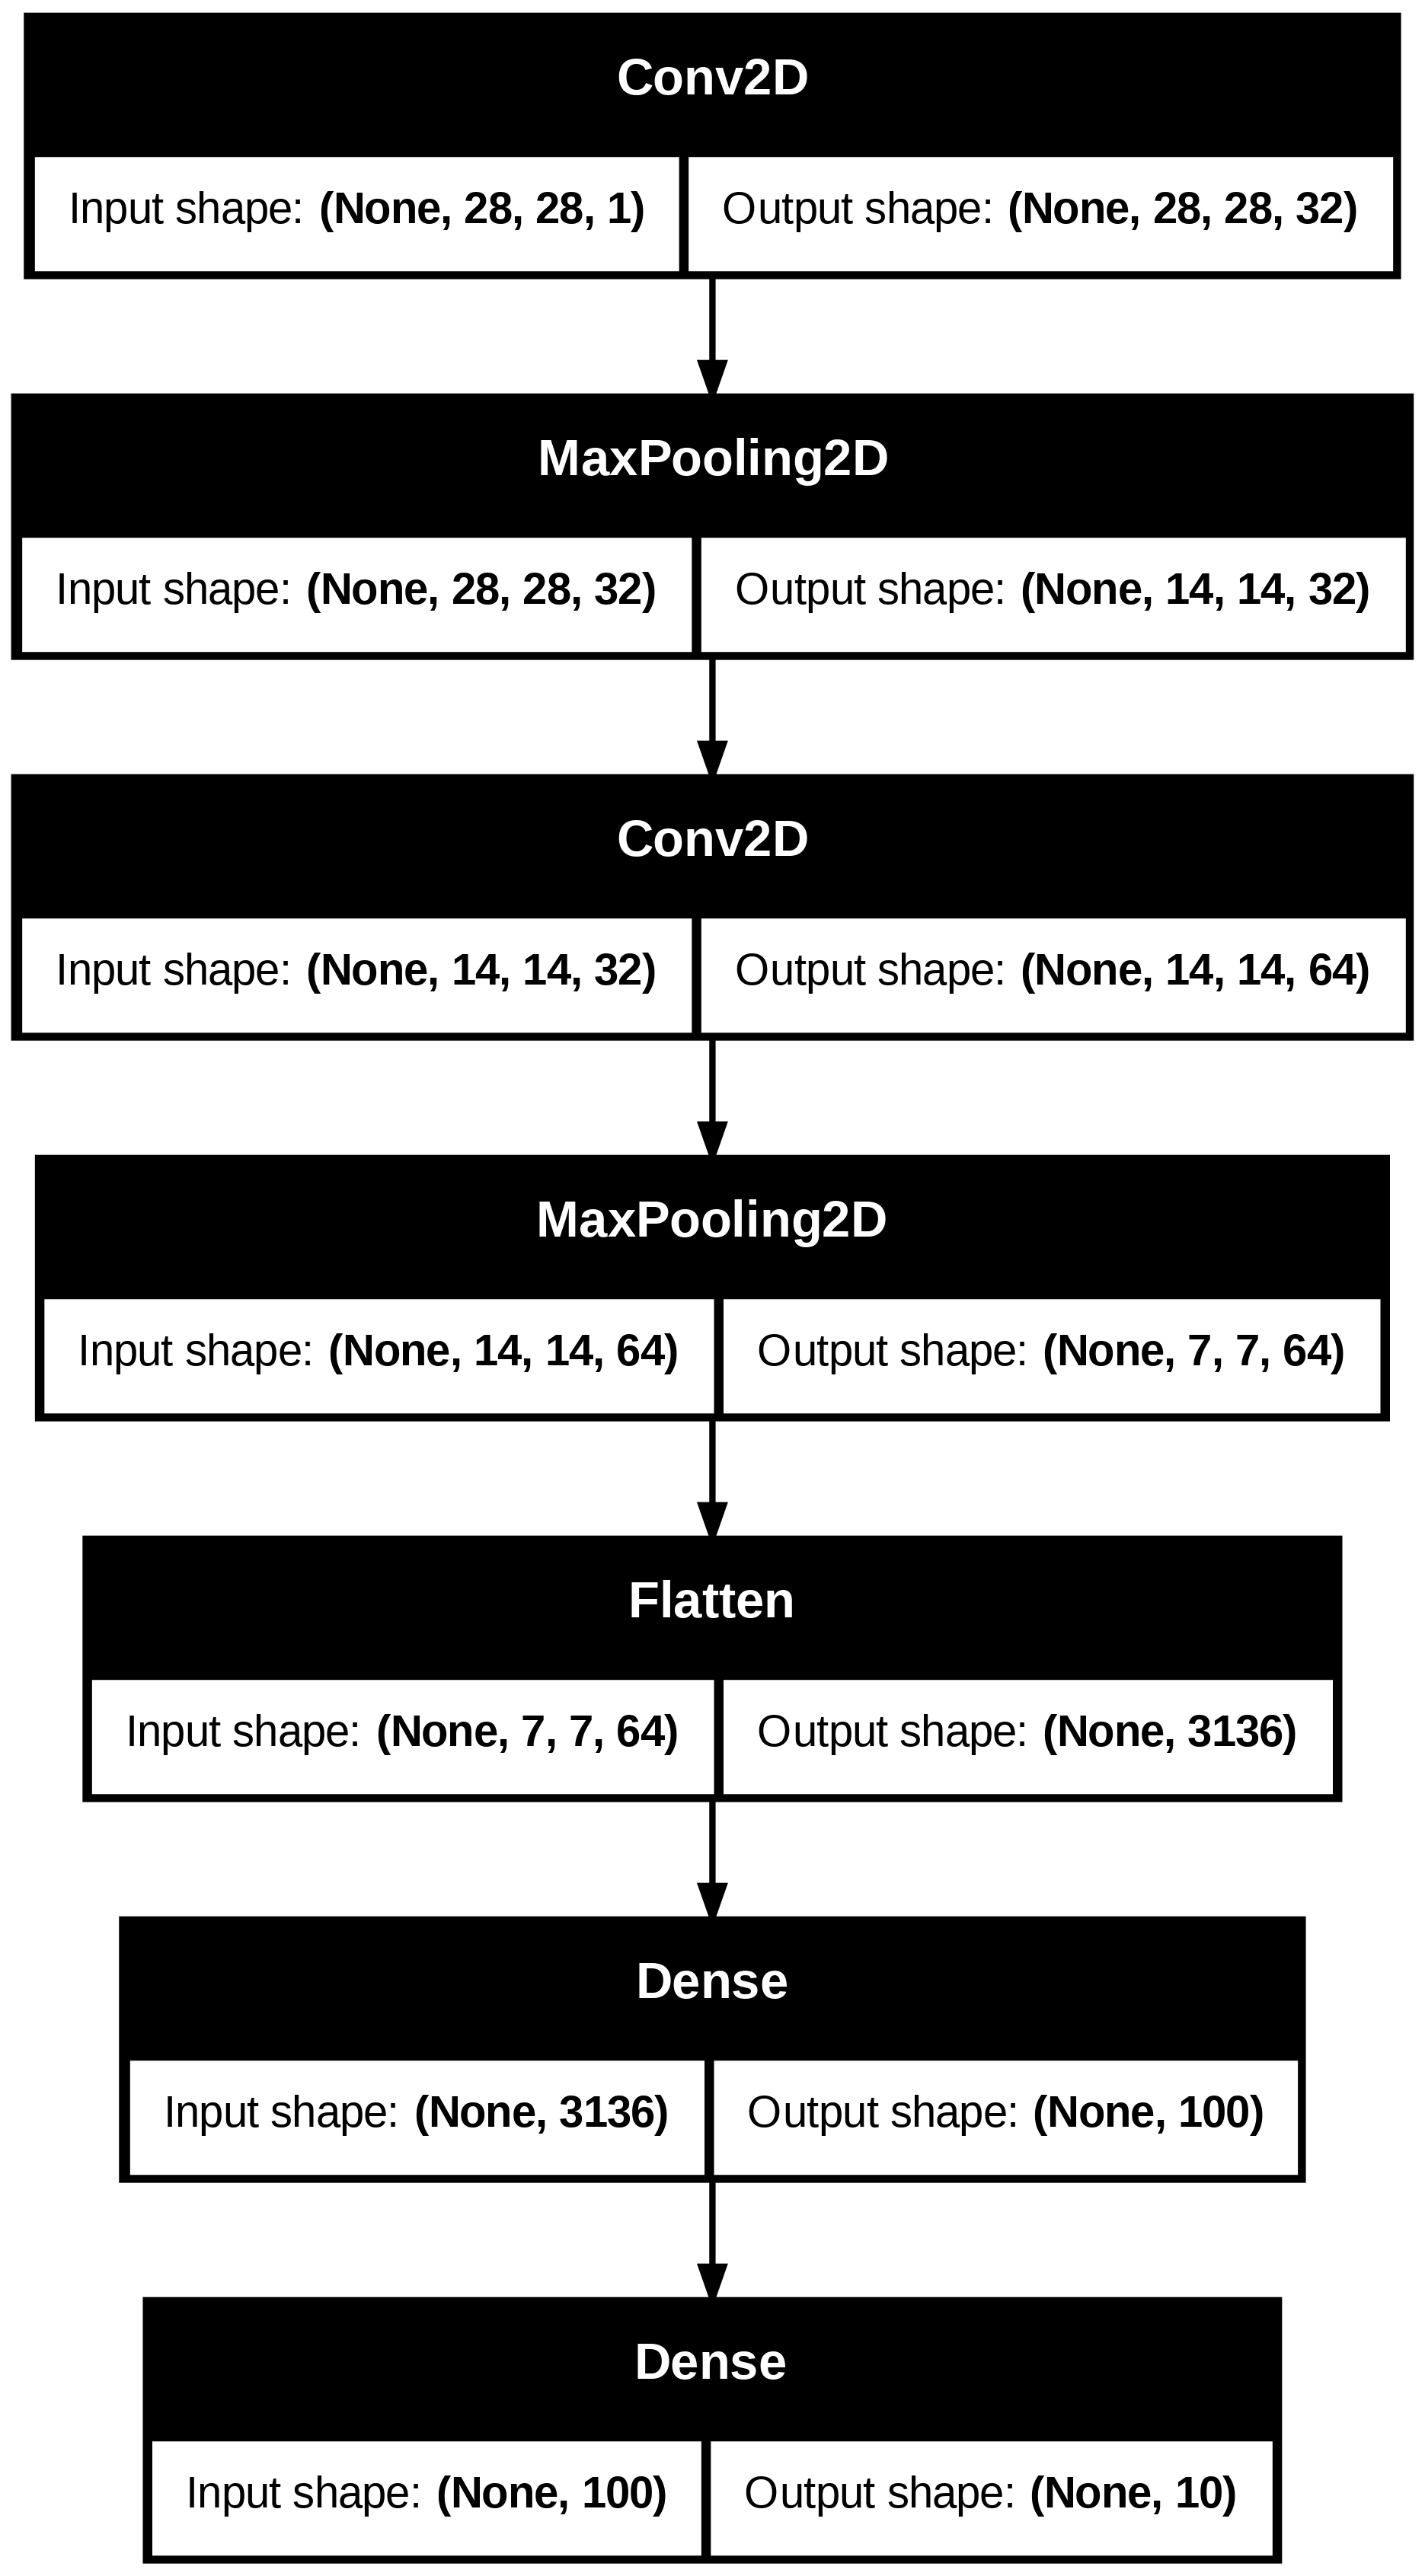

In [8]:
keras.utils.plot_model(model , show_shapes = 1 , to_file = "cnn_architecture.png", dpi = 300)

In [9]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_cnn_model.h5", save_best_only = 1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2 , restore_best_weights = 1)
history = model.fit(train_scaled, train_target , epochs = 20, validation_data = (val_scaled , val_target), callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/20
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7814 - loss: 0.6083

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7820 - loss: 0.6068 - val_accuracy: 0.8876 - val_loss: 0.3100
Epoch 2/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 0.3021

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8922 - loss: 0.3021 - val_accuracy: 0.9012 - val_loss: 0.2774
Epoch 3/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.2357

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9143 - loss: 0.2357 - val_accuracy: 0.9021 - val_loss: 0.2622
Epoch 4/20
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9232 - loss: 0.2095

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9232 - loss: 0.2095 - val_accuracy: 0.9063 - val_loss: 0.2520
Epoch 5/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.1796

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9335 - loss: 0.1796 - val_accuracy: 0.9183 - val_loss: 0.2271
Epoch 6/20
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9443 - loss: 0.1491

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9443 - loss: 0.1492 - val_accuracy: 0.9206 - val_loss: 0.2241
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9491 - loss: 0.1355 - val_accuracy: 0.9182 - val_loss: 0.2298
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9588 - loss: 0.1096 - val_accuracy: 0.9187 - val_loss: 0.2461


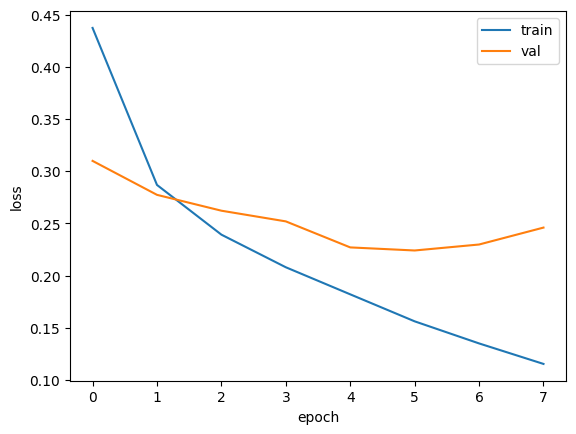

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [12]:
model.evaluate(val_scaled , val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2205


[0.22410014271736145, 0.9205833077430725]